In [1]:
# Importacion de df
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder # Transformacion de variable objetivo

# Normalizacion de datos
from sklearn.preprocessing import MinMaxScaler

# Modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Se paracion de datos
from sklearn.model_selection import train_test_split

# Balanceo de datos
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
# Pipeline
from imblearn.pipeline import Pipeline as imbpipeline

# Modelos de clasificacion
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Arbol de Desicion
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN

# Matriz de confusion y metricas
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Validacion cruzada
from sklearn.model_selection import StratifiedKFold , cross_val_score

# Curva ROC
from sklearn.metrics import RocCurveDisplay , roc_auc_score
# Curva de precision vs recall
from sklearn.metrics import PrecisionRecallDisplay , average_precision_score

# Ajuste de hiperparametros
from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

api_url = "https://raw.githubusercontent.com/JulioDoniz/Telcom-X-part-2/refs/heads/main/datos_tratados.csv"

# Cargar los datos directamente desde la API y convertirlos a DataFrame
df = pd.read_csv(api_url)
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


# ***Funciones***

In [2]:
def obtener_metricas_modelo(y_true, y_pred): #####################################################
    """
    Calcula métricas de evaluación para un modelo de clasificación binaria.

    Parámetros:
    - y_true: array o serie de valores verdaderos de la variable objetivo.
    - y_pred: array o serie de valores predichos por el modelo.


    Retorna:
    - Un diccionario con las métricas:
        - 'Modelo': nombre del modelo
        - 'Accuracy': exactitud
        - 'Precision': precisión
        - 'Recall': sensibilidad
        - 'F1-Score': media armónica entre precisión y recall
        - 'Intervalo de Confianza': string con los límites inferior y superior del intervalo
    """
    metricas_dict = {
        'Accuracy': np.round(accuracy_score(y_true, y_pred), 4),
        'Precision': np.round(precision_score(y_true, y_pred), 4),
        'Recall': np.round(recall_score(y_true, y_pred), 4),
        'F1-Score': np.round(f1_score(y_true, y_pred), 4),
    }

    return metricas_dict

# ***Preparacion***


In [3]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-372009398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   int64  
 11  PaymentMethod     7267 non-null   object 
 12  InternetService   7267 non-null   object 
 13  OnlineSecurity    7267 non-null   int64  
 14  OnlineBackup      7267 non-null   int64  
 15  DeviceProtection  7267 non-null   int64  
 16  TechSupport       7267 non-null   int64  


In [5]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,PaperlessBilling,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.593230,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,2280.634213,64.720098,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.491265,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,2268.632997,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.800000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.225000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1391.000000,70.300000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3785.300000,89.875000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8684.800000,118.750000,3.958333


In [6]:
df = df.drop(['CustomerID'], axis=1)
df

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0.0,Female,0,1,1,9,1,0,One year,1,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0.0,Male,0,0,0,9,1,1,Month-to-month,0,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,1.0,Male,0,0,0,4,1,0,Month-to-month,1,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,1.0,Male,1,1,0,13,1,0,Month-to-month,1,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,1.0,Female,1,1,0,3,1,0,Month-to-month,1,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,0,0,13,1,0,One year,0,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,1.0,Male,0,1,0,22,1,1,Month-to-month,1,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,0.0,Male,0,0,0,2,1,0,Month-to-month,1,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,0.0,Male,0,1,1,67,1,0,Two year,0,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


# ***Encoding***

Transformar las variables categoricas a formato numerico para hacerlas compatibles con algoritmos de maching learning

In [7]:

variables_categoricas = [
    'Gender',
    'Partner',
    'Dependents',
    'InternetService',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

In [8]:
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     variables_categoricas),
    remainder='passthrough')

In [9]:
df_OneHotEncoder = one_hot_encoder.fit_transform(df)
df_OneHotEncoder = pd.DataFrame(df_OneHotEncoder, columns=one_hot_encoder.get_feature_names_out())
df_OneHotEncoder

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Partner_0,onehotencoder__Partner_1,onehotencoder__Dependents_0,onehotencoder__Dependents_1,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,...,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__ChargesTotal,remainder__ChargesMonthly,remainder__DailyCharges
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,593.30,65.60,2.186667
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,542.40,59.90,1.996667
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,280.85,73.90,2.463333
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1237.85,98.00,3.266667
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,742.90,55.15,1.838333
7263,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1873.70,85.10,2.836667
7264,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,92.75,50.30,1.676667
7265,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4627.65,67.85,2.261667


In [10]:
df_OneHotEncoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__Gender_Female                            7267 non-null   float64
 1   onehotencoder__Gender_Male                              7267 non-null   float64
 2   onehotencoder__Partner_0                                7267 non-null   float64
 3   onehotencoder__Partner_1                                7267 non-null   float64
 4   onehotencoder__Dependents_0                             7267 non-null   float64
 5   onehotencoder__Dependents_1                             7267 non-null   float64
 6   onehotencoder__InternetService_DSL                      7267 non-null   float64
 7   onehotencoder__InternetService_Fiber optic              7267 non-null   float64
 8   onehotencoder__InternetService_No     

# ***Matriz de corrlacion***

In [11]:
corr = df_OneHotEncoder.corr()

<Axes: >

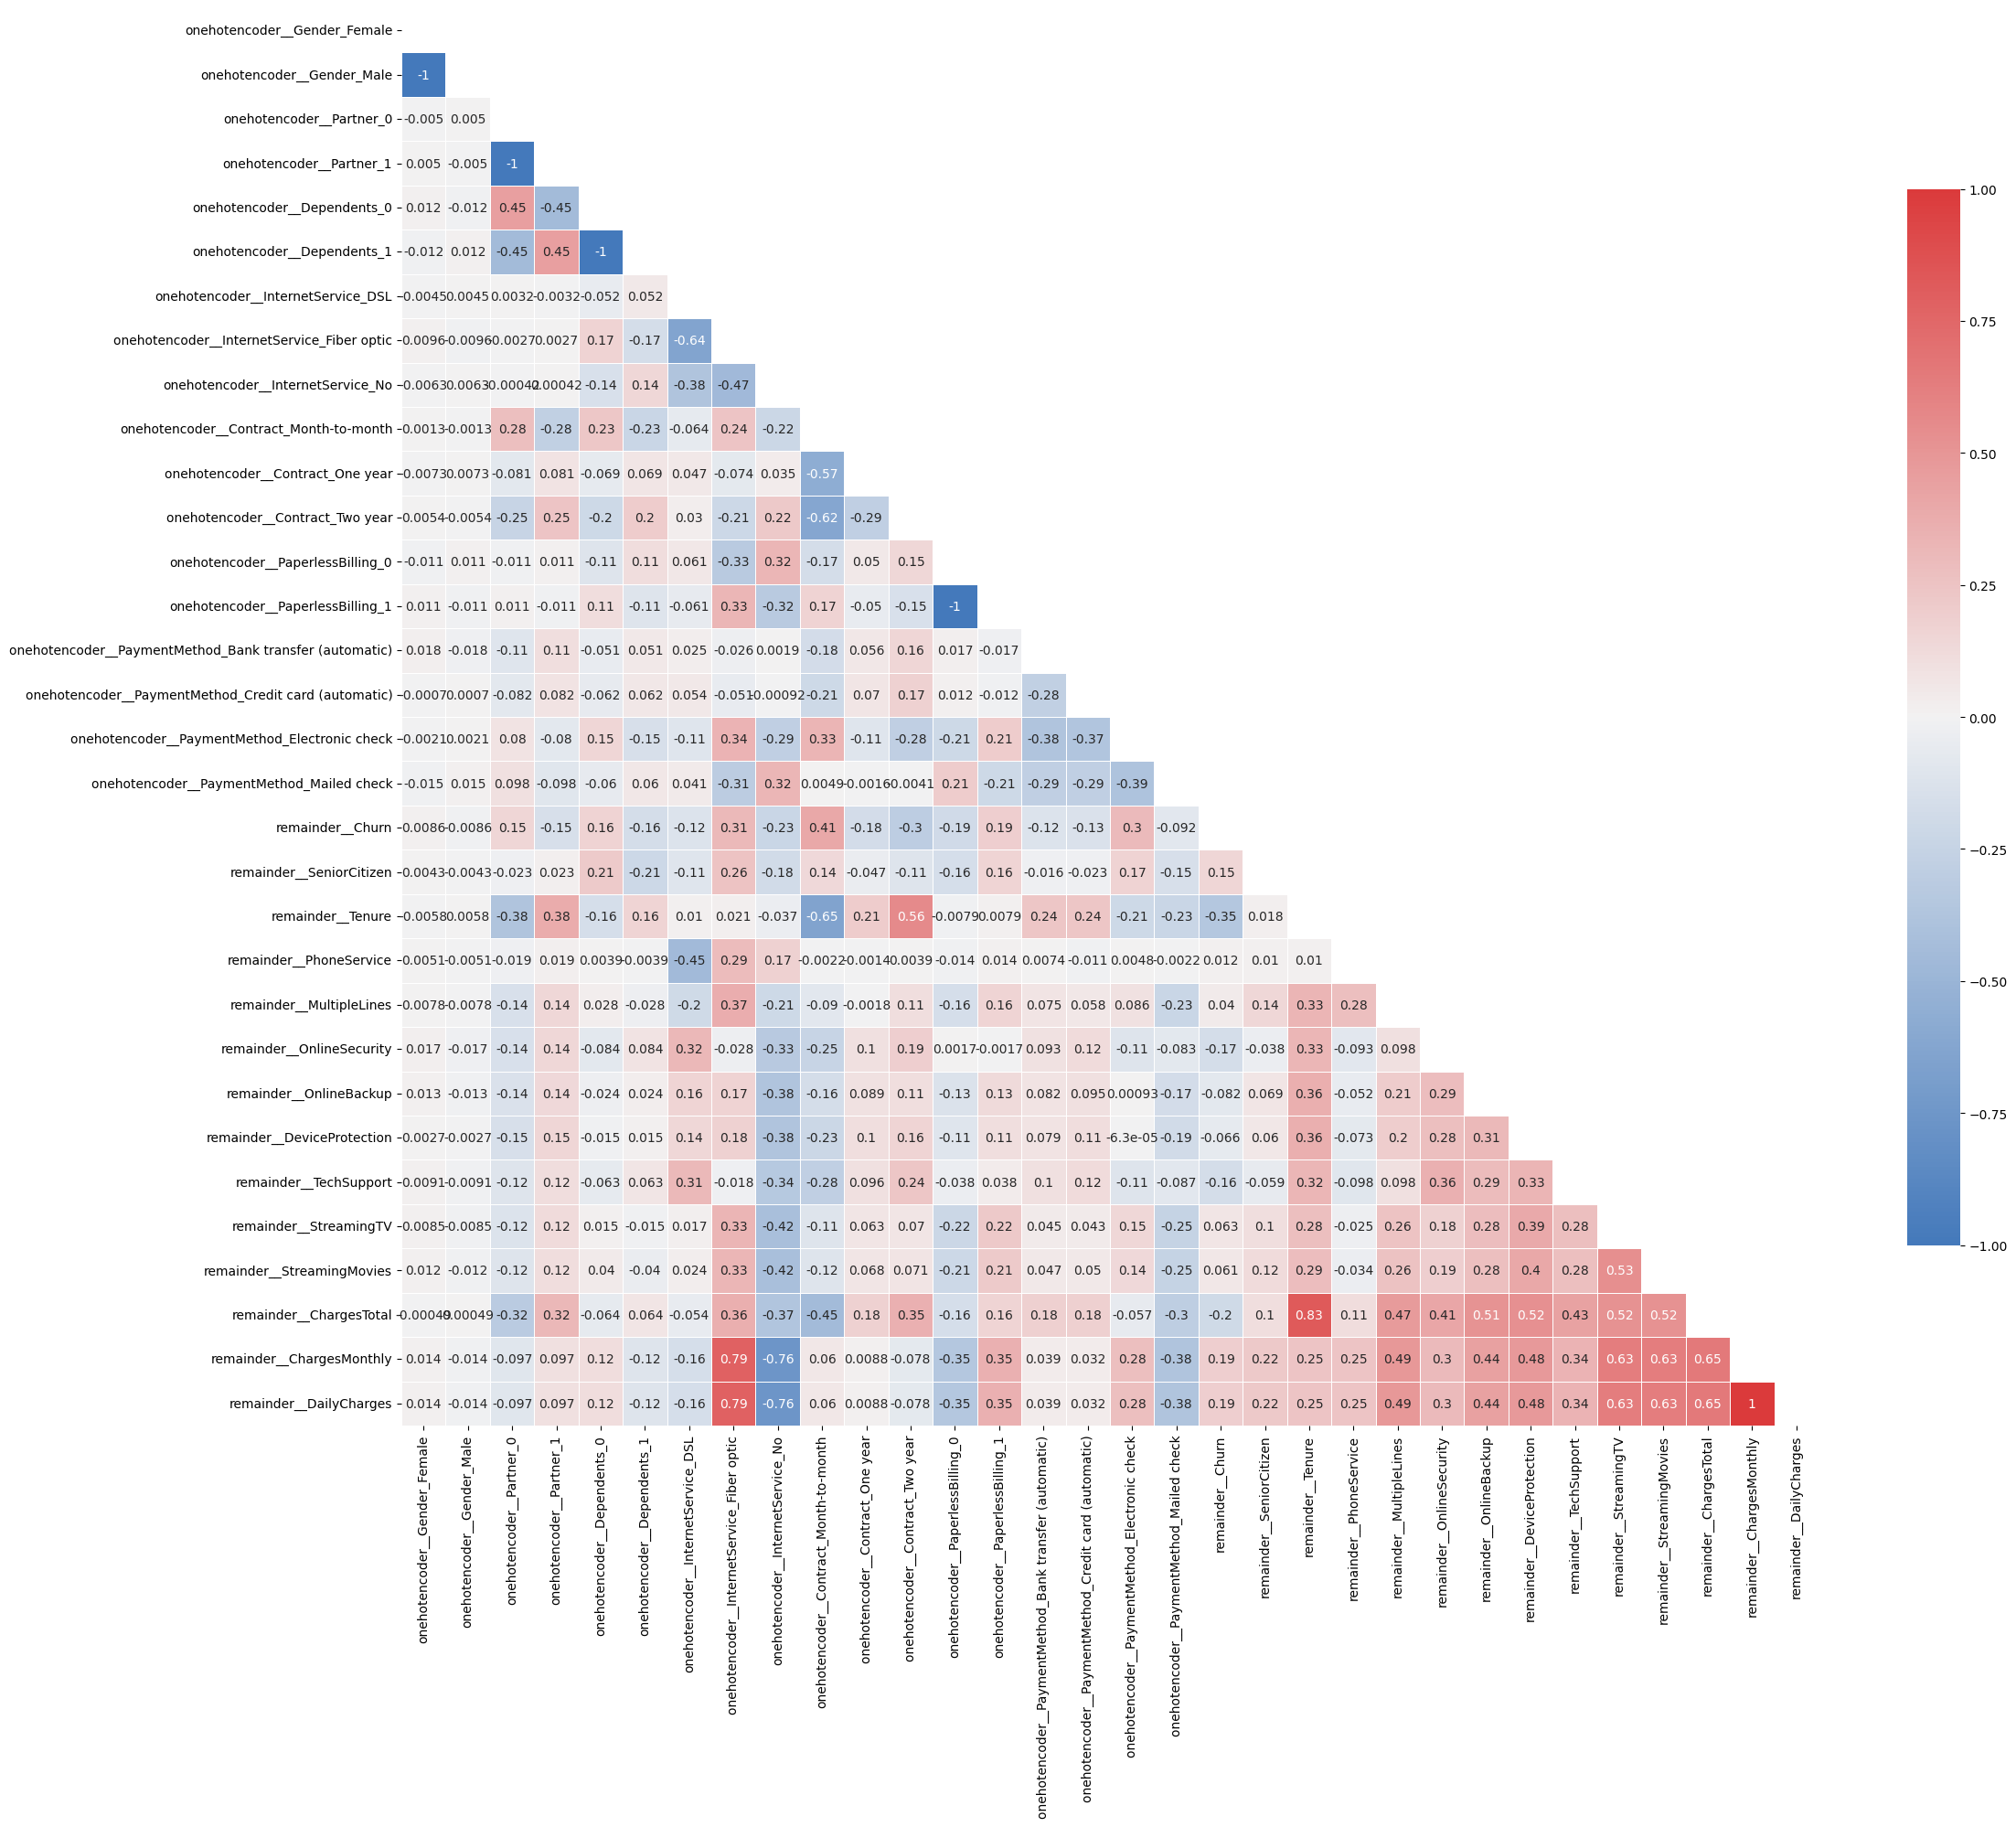

In [12]:
matriz = np.zeros_like(corr, dtype=bool)
matriz[np.triu_indices_from(matriz)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(25, 30))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(250, 12, as_cmap=True)

sns.heatmap(corr, mask=matriz, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# ***Separacion de datos***

In [13]:
df_OneHotEncoder.dropna(inplace=True)

In [14]:
y = df_OneHotEncoder['remainder__Churn']
X = df_OneHotEncoder.drop(['remainder__Churn'], axis=1)

In [15]:
X

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Partner_0,onehotencoder__Partner_1,onehotencoder__Dependents_0,onehotencoder__Dependents_1,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,...,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__ChargesTotal,remainder__ChargesMonthly,remainder__DailyCharges
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,593.30,65.60,2.186667
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,542.40,59.90,1.996667
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,280.85,73.90,2.463333
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1237.85,98.00,3.266667
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,742.90,55.15,1.838333
7263,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1873.70,85.10,2.836667
7264,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,92.75,50.30,1.676667
7265,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4627.65,67.85,2.261667


In [16]:
y

,remainder__Churn
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
7262,0.0
7263,1.0
7264,0.0
7265,0.0


In [17]:
nearmiss = NearMiss()
X_resampled, y_resampled = nearmiss.fit_resample(X, y)

In [18]:
X_resampled

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Partner_0,onehotencoder__Partner_1,onehotencoder__Dependents_0,onehotencoder__Dependents_1,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,...,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__ChargesTotal,remainder__ChargesMonthly,remainder__DailyCharges
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.90,20.90,0.696667
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.90,69.90,2.330000
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.20,20.20,0.673333
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.20,20.20,0.673333
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.20,20.20,0.673333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2030.30,96.80,3.226667
3734,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,790.15,83.85,2.795000
3735,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.15,70.15,2.338333
3736,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.50,20.95,0.698333


In [19]:
y_resampled

,remainder__Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3733,1.0
3734,1.0
3735,1.0
3736,1.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [21]:
X_train

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Partner_0,onehotencoder__Partner_1,onehotencoder__Dependents_0,onehotencoder__Dependents_1,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,...,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__ChargesTotal,remainder__ChargesMonthly,remainder__DailyCharges
485,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,791.70,85.50,2.850000
2170,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.15,45.15,1.505000
3291,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4211.55,100.00,3.333333
1097,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,498.25,51.20,1.706667
258,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.10,20.35,0.678333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1185.00,82.65,2.755000
1294,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,357.60,59.45,1.981667
860,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2184.60,85.20,2.840000
3507,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,118.50,29.65,0.988333


In [22]:
y_train

,remainder__Churn
485,0.0
2170,1.0
3291,1.0
1097,0.0
258,0.0
...,...
1130,0.0
1294,0.0
860,0.0
3507,1.0


# ***Decision Tree***

In [23]:
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred_tree1 = tree1.predict(X_test)

In [25]:
classification_report1 = classification_report(y_test, y_pred_tree1)
print(classification_report1)

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64       379
         1.0       0.63      0.63      0.63       369

    accuracy                           0.64       748
   macro avg       0.64      0.64      0.64       748
weighted avg       0.64      0.64      0.64       748



In [26]:
# Define el parametro de grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Crea el objeto GridSearchCV
grid_search_tree1 = GridSearchCV(estimator=tree1, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='recall', n_jobs=-1)

# Ajusta el GridSearch a los datos
grid_search_tree1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [27]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [28]:
y_pred_tree2 = tree2.predict(X_test)

In [29]:
classification_report2 = classification_report(y_test, y_pred_tree2)
print(classification_report2)

              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63       379
         1.0       0.63      0.77      0.69       369

    accuracy                           0.66       748
   macro avg       0.67      0.66      0.66       748
weighted avg       0.67      0.66      0.66       748



In [30]:
importances = tree2.feature_importances_
feature_importances = pd.DataFrame({'Features' : X.columns , 'Importances': (importances*100).round(2)}).sort_values('Importances' , ascending = False)
feature_importances

,Features,Importances
7,onehotencoder__InternetService_Fiber optic,31.99
28,remainder__ChargesTotal,16.68
19,remainder__Tenure,16.11
6,onehotencoder__InternetService_DSL,11.40
30,remainder__DailyCharges,8.33
21,remainder__MultipleLines,3.79
9,onehotencoder__Contract_Month-to-month,3.38
16,onehotencoder__PaymentMethod_Electronic check,2.42
29,remainder__ChargesMonthly,1.40
22,remainder__OnlineSecurity,1.26


In [31]:
resultados = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall',	'F1-Score'])
model_features = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
ct_features = [ i if i != 0 else 1 for i in range(0,10)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_train[selected_features]
  model_features.fit(X_train_sel , y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas =  obtener_metricas_modelo(y_true=y_train, y_pred=y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,2,3,4,5,6,7,8,9
Accuracy,0.6418,0.6552,0.6686,0.6692,0.6749,0.6753,0.6870,0.6853,0.6853
Precision,0.6293,0.6379,0.6356,0.6292,0.6362,0.6823,0.6593,0.6575,0.6575
Recall,0.6960,0.7233,0.7953,0.8293,0.8220,0.6600,0.7780,0.7780,0.7780
F1-Score,0.6610,0.6779,0.7065,0.7156,0.7173,0.6710,0.7138,0.7127,0.7127


In [32]:
selected_features_tree2 = feature_importances['Features'].values[:4]
X_train_selected_features = X_train[selected_features_tree2]
X_train_selected_features

,onehotencoder__InternetService_Fiber optic,remainder__ChargesTotal,remainder__Tenure,onehotencoder__InternetService_DSL
485,1.0,791.70,9.0,0.0
2170,0.0,45.15,1.0,1.0
3291,1.0,4211.55,43.0,0.0
1097,0.0,498.25,10.0,1.0
258,0.0,35.10,2.0,0.0
...,...,...,...,...
1130,1.0,1185.00,14.0,0.0
1294,0.0,357.60,6.0,1.0
860,1.0,2184.60,26.0,0.0
3507,0.0,118.50,4.0,1.0


In [33]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree3.fit(X_train_selected_features, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [34]:
y_pred_tree3 = tree3.predict(X_test[selected_features_tree2])
print(classification_report(y_test, y_pred_tree3))

              precision    recall  f1-score   support

         0.0       0.74      0.51      0.61       379
         1.0       0.62      0.82      0.71       369

    accuracy                           0.66       748
   macro avg       0.68      0.67      0.66       748
weighted avg       0.68      0.66      0.66       748



# ***Random Forest***

In [35]:
randomforest1 = RandomForestClassifier(random_state=42)
randomforest1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred_randomforest1 = randomforest1.predict(X_test)
classification_report(y_test, y_pred_randomforest1)
print(classification_report(y_test, y_pred_randomforest1))

              precision    recall  f1-score   support

         0.0       0.68      0.67      0.67       379
         1.0       0.67      0.68      0.67       369

    accuracy                           0.67       748
   macro avg       0.67      0.67      0.67       748
weighted avg       0.67      0.67      0.67       748



In [39]:
# Define el parametro de grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Crea el objeto GridSearchCV
grid_search_rf = GridSearchCV(estimator=randomforest1, param_grid=param_grid_rf, cv=StratifiedKFold(n_splits=5), scoring='recall', n_jobs=-1)

# Ajusta el GridSearch a los datos
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [40]:
randomforest2 = RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)
randomforest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [41]:
y_pred_randomforest2 = randomforest2.predict(X_test)
classification_report(y_test, y_pred_randomforest2)
print(classification_report(y_test, y_pred_randomforest2))

              precision    recall  f1-score   support

         0.0       0.74      0.60      0.66       379
         1.0       0.66      0.78      0.71       369

    accuracy                           0.69       748
   macro avg       0.70      0.69      0.69       748
weighted avg       0.70      0.69      0.69       748



In [45]:
resultados = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall',	'F1-Score'])
model_features = RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)
ct_features = [ i if i != 0 else 1 for i in range(5,15)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_train[selected_features]
  model_features.fit(X_train_sel , y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas =  obtener_metricas_modelo(y_true=y_train, y_pred=y_pred)
  resultados[i] = list(metricas.values())

resultados

,5,6,7,8,9,10,11,12,13,14
Accuracy,0.6773,0.6987,0.6920,0.6940,0.7040,0.6930,0.7007,0.7023,0.6980,0.7023
Precision,0.6390,0.6636,0.6613,0.6655,0.6746,0.6615,0.6672,0.6723,0.6685,0.6753
Recall,0.8200,0.8100,0.7913,0.7840,0.7920,0.7947,0.8047,0.7933,0.7893,0.7833
F1-Score,0.7182,0.7295,0.7205,0.7199,0.7286,0.7220,0.7295,0.7278,0.7239,0.7253


In [46]:
selected_features_rf = feature_importances['Features'].values[:11]
X_train_selected_features = X_train[selected_features_rf]
X_train_selected_features

,onehotencoder__InternetService_Fiber optic,remainder__ChargesTotal,remainder__Tenure,onehotencoder__InternetService_DSL,remainder__DailyCharges,remainder__MultipleLines,onehotencoder__Contract_Month-to-month,onehotencoder__PaymentMethod_Electronic check,remainder__ChargesMonthly,remainder__OnlineSecurity,onehotencoder__PaymentMethod_Mailed check
485,1.0,791.70,9.0,0.0,2.850000,1.0,1.0,1.0,85.50,0.0,0.0
2170,0.0,45.15,1.0,1.0,1.505000,0.0,1.0,1.0,45.15,0.0,0.0
3291,1.0,4211.55,43.0,0.0,3.333333,1.0,0.0,1.0,100.00,0.0,0.0
1097,0.0,498.25,10.0,1.0,1.706667,0.0,1.0,1.0,51.20,0.0,0.0
258,0.0,35.10,2.0,0.0,0.678333,0.0,1.0,0.0,20.35,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,1185.00,14.0,0.0,2.755000,1.0,1.0,1.0,82.65,0.0,0.0
1294,0.0,357.60,6.0,1.0,1.981667,0.0,1.0,1.0,59.45,0.0,0.0
860,1.0,2184.60,26.0,0.0,2.840000,0.0,0.0,1.0,85.20,0.0,0.0
3507,0.0,118.50,4.0,1.0,0.988333,0.0,1.0,1.0,29.65,0.0,0.0


In [47]:
randomforest3 = RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)
randomforest3.fit(X_train_selected_features, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [48]:
y_pred_randomforest3 = randomforest3.predict(X_test[selected_features_rf])
print(classification_report(y_test, y_pred_randomforest3))

              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66       379
         1.0       0.65      0.78      0.71       369

    accuracy                           0.69       748
   macro avg       0.70      0.69      0.68       748
weighted avg       0.70      0.69      0.68       748



# ***Evaluacion de modelos***

Para un entorno de Google Colab, la mejor manera de formatear el texto es usando Markdown, que permite estructurar y estilizar el contenido fácilmente dentro de las celdas de texto. Aquí tienes el texto con el formato que solicitaste, utilizando diferentes niveles de encabezado, listas y **negritas** para resaltar.

# **Análisis de Modelos de Árbol de Decisión y Random Forest**

---

Se analizó el rendimiento de los modelos de Árbol de Decisión y Random Forest basándose en las métricas de **Exactitud (Accuracy)**, **Precisión**, **Recall** y **F1-score** de los informes de clasificación y el análisis de **importancia de características**.

## **Análisis de Métricas**

### **Árbol de Decisión**

* **`tree1` (sin ajuste):**
    * **Precision**: 0.64
    * **Recall**: 0.64
    * **F1-score**: 0.64
    * **Accuracy**: 0.64
    * _Rendimiento equilibrado pero moderado._

* **`tree2` (con ajuste y todas las características):**
    * **Precision**: 0.71 (No Churn), 0.63 (Churn)
    * **Recall**: 0.56 (No Churn), 0.77 (Churn)
    * **F1-score**: 0.63 (No Churn), 0.69 (Churn)
    * **Accuracy**: 0.66
    * _Mejoró el **Recall** para la clase minoritaria (**Churn**), importante en datos desbalanceados._

* **`tree3` (con ajuste y 4 características principales):**
    * **Precision**: 0.74 (No Churn), 0.62 (Churn)
    * **Recall**: 0.51 (No Churn), 0.82 (Churn)
    * **F1-score**: 0.61 (No Churn), 0.71 (Churn)
    * **Accuracy**: 0.66
    * _Mantuvo la **Accuracy**, pero aumentó el **Recall** para **Churn** a costa de la **Precision** para **No Churn**._

### **Random Forest**

* **`randomforest1` (sin ajuste):**
    * **Precision**: 0.68 (No Churn), 0.67 (Churn)
    * **Recall**: 0.67 (No Churn), 0.68 (Churn)
    * **F1-score**: 0.67
    * **Accuracy**: 0.67
    * _Rendimiento general ligeramente mejor que el primer Árbol de Decisión, con métricas equilibradas._

* **`randomforest2` (con ajuste y todas las características):**
    * **Precision**: 0.74 (No Churn), 0.66 (Churn)
    * **Recall**: 0.60 (No Churn), 0.78 (Churn)
    * **F1-score**: 0.66 (No Churn), 0.71 (Churn)
    * **Accuracy**: **0.69**
    * _Tuvo la **mejor Accuracy general** y un buen equilibrio entre métricas. **Mejor desempeño global**._

* **`randomforest3` (con ajuste y 11 características principales):**
    * **Precision**: 0.74 (No Churn), 0.65 (Churn)
    * **Recall**: 0.59 (No Churn), 0.78 (Churn)
    * **F1-score**: 0.66 (No Churn), 0.71 (Churn)
    * **Accuracy**: 0.69
    * _Rendimiento muy similar al modelo anterior, demostrando que la reducción de características no degradó significativamente el resultado._

---

## **Conclusiones del Desempeño**

* **Mejor Desempeño**: El modelo **`randomforest2`** (RandomForestClassifier ajustado con hiperparámetros y todas las características) fue el que tuvo el **mejor desempeño general**.
    * Alcanzó la **más alta Accuracy (0.69)**.
    * Logró un buen **Recall (0.78)** y **F1-score (0.71)** para la clase minoritaria `Churn`.
    * Mantuvo una buena **Precision (0.74)** para la clase mayoritaria `No Churn`.

---

## **Overfitting y Underfitting**

* **Overfitting**: No se observaron señales de **overfitting extremo**. Si existiera, las métricas del conjunto de entrenamiento serían mucho más altas que las del conjunto de prueba. El modelo `randomforest1` sin ajustar pudo haber tenido un leve **overfitting** inicial, que fue controlado con el ajuste de hiperparámetros.
    * **Causa**: Modelos muy complejos o pocos datos.
    * **Ajuste**: Se mitigó con el ajuste de hiperparámetros (**`max_depth`**, **`min_samples_split`**, **`n_estimators`**) y **validación cruzada**.

* **Underfitting**: Los modelos iniciales (`tree1` y `randomforest1`) podrían haber presentado un leve **underfitting**, ya que el ajuste de hiperparámetros mejoró su rendimiento. Sin embargo, no fue severo.
    * **Causa**: Modelos demasiado simples o falta de datos de entrenamiento.
    * **Ajuste**: El ajuste de hiperparámetros fue suficiente para mejorar el rendimiento y evitarlo.

En general, los modelos ajustados, especialmente el Random Forest, mostraron un buen equilibrio y no presentaron problemas graves de **overfitting** o **underfitting**.

# Informe Detallado sobre Factores de Cancelación y Estrategias de Retención

## Introducción

Este informe presenta un análisis de los factores que más influyen en la cancelación de clientes (Churn) utilizando modelos de clasificación y técnicas de evaluación de importancia de características. El objetivo es identificar las variables clave asociadas con la cancelación y proponer estrategias de retención basadas en estos hallazgos.

## Metodología

Se utilizaron los datos de clientes de Telco, que fueron preprocesados mediante One-Hot Encoding para las variables categóricas y se manejaron los valores nulos eliminando las filas correspondientes. La clase objetivo ('Churn') fue balanceada utilizando la técnica NearMiss. Se entrenaron y evaluaron modelos de Árbol de Decisión y Random Forest, tanto con hiperparámetros por defecto como ajustados mediante GridSearchCV. La importancia de las características se analizó utilizando la propiedad `feature_importances_` de los modelos de árbol.

## Análisis de Importancia de Características

El análisis de importancia de características, basado en el modelo de Random Forest ajustado, reveló las siguientes variables como las más influyentes en la predicción de la cancelación de clientes:

| Característica                                       | Importancia (%) |
| :--------------------------------------------------- | :-------------- |
| onehotencoder\_\_InternetService\_Fiber optic        | 31.99           |
| remainder\_\_ChargesTotal                            | 16.68           |
| remainder\_\_Tenure                                  | 16.11           |
| onehotencoder\_\_InternetService\_DSL                | 11.40           |
| remainder\_\_DailyCharges                             | 8.33            |
| remainder\_\_MultipleLines                           | 3.79            |
| onehotencoder\_\_Contract\_Month-to-month            | 3.38            |
| onehotencoder\_\_PaymentMethod\_Electronic check     | 2.42            |
| remainder\_\_ChargesMonthly                           | 1.40            |
| remainder\_\_OnlineSecurity                          | 1.26            |
| onehotencoder\_\_PaymentMethod\_Mailed check         | 0.77            |
| onehotencoder\_\_Contract\_Two year                  | 0.76            |
| remainder\_\_StreamingTV                              | 0.71            |
| remainder\_\_TechSupport                             | 0.66            |
| onehotencoder\_\_PaperlessBilling\_1                 | 0.34            |

*Nota: Las características con importancia del 0% no se incluyeron en esta tabla.*

**Interpretación de los Factores Clave:**

*   **Servicio de Internet (Fiber optic y DSL):** La importancia significativa de las variables relacionadas con el servicio de internet, especialmente "Fiber optic", sugiere que el tipo de conexión a internet es un factor crucial. Los clientes con fibra óptica podrían tener una mayor propensión a la cancelación, posiblemente debido a expectativas no cumplidas, problemas de servicio o precios competitivos. Por otro lado, tener servicio DSL también es relevante, aunque en menor medida.
*   **Cargos Totales y Mensuales (ChargesTotal, ChargesMonthly, DailyCharges):** Los cargos asociados a los servicios tienen una alta influencia. Un incremento en los cargos totales y mensuales parece estar fuertemente correlacionado con la cancelación. Esto es intuitivo, ya que los costos son un factor determinante en la decisión de un cliente de permanecer o irse.
*   **Antigüedad (Tenure):** La antigüedad del cliente es un factor importante. Clientes con menor antigüedad tienden a ser más propensos a cancelar, lo que resalta la importancia de las estrategias de incorporación y retención temprana.
*   **Líneas Múltiples (MultipleLines):** Tener múltiples líneas parece tener cierta influencia en la cancelación, aunque menor que los factores anteriores.
*   **Tipo de Contrato (Contract_Month-to-month, Contract_Two year):** El tipo de contrato, especialmente los contratos mes a mes, están asociados con una mayor probabilidad de cancelación. Los contratos a largo plazo (uno o dos años) tienden a retener a los clientes por más tiempo.
*   **Método de Pago (PaymentMethod_Electronic check, PaymentMethod_Mailed check):** Ciertos métodos de pago, como el cheque electrónico, muestran una mayor importancia, lo que podría indicar problemas de satisfacción o conveniencia asociados a estos métodos.
*   **Servicios Adicionales (OnlineSecurity, StreamingTV, TechSupport):** La ausencia o presencia de servicios adicionales como seguridad en línea, streaming de TV y soporte técnico también influyen en la decisión de cancelar, aunque su importancia es menor en comparación con los factores principales.

## Rendimiento de los Modelos

El análisis de rendimiento de los modelos (detallado en el informe de evaluación anterior) mostró que el modelo **RandomForestClassifier ajustado con hiperparámetros y utilizando todas las características** tuvo el mejor desempeño general en el conjunto de prueba, con una Accuracy del 0.69, un Recall para la clase 'Churn' de 0.78 y un F1-score para 'Churn' de 0.71. Esto indica que el modelo es razonablemente efectivo para identificar a los clientes que probablemente cancelarán.

## Identificación de Principales Factores que Afectan la Cancelación

Basado en el análisis de importancia de características, los principales factores que afectan la cancelación de clientes son:

1.  **Tipo de Servicio de Internet (especialmente Fibra Óptica):** Los problemas o la insatisfacción con el servicio de internet, particularmente la fibra óptica, son un motor clave de la cancelación.
2.  **Costo de los Servicios:** Los cargos totales y mensuales elevados son un fuerte predictor de la cancelación.
3.  **Antigüedad del Cliente:** Los clientes nuevos son más propensos a cancelar.
4.  **Tipo de Contrato (Mes a Mes):** Los clientes con contratos mes a mes tienen una mayor flexibilidad y, por lo tanto, una mayor probabilidad de cancelar.
5.  **Método de Pago (Cheque Electrónico):** La conveniencia o los problemas asociados con ciertos métodos de pago pueden contribuir a la cancelación.

## Estrategias de Retención Basadas en los Resultados

Considerando los principales factores identificados, se proponen las siguientes estrategias de retención:

1.  **Mejorar la Calidad y la Experiencia del Servicio de Fibra Óptica:**
    *   **Estrategia:** Identificar y abordar proactivamente los problemas de servicio experimentados por los clientes de fibra óptica. Esto podría incluir monitoreo de la red, soporte técnico mejorado y comunicación transparente sobre interrupciones o mantenimiento.
    *   **Acción:** Implementar encuestas de satisfacción específicas para usuarios de fibra óptica, ofrecer soporte técnico especializado para fibra y mejorar la infraestructura si es necesario.

2.  **Optimizar la Estructura de Precios y Ofrecer Incentivos:**
    *   **Estrategia:** Revisar las estructuras de precios, especialmente para clientes con cargos totales o mensuales elevados. Considerar ofrecer descuentos, paquetes de servicios o planes de fidelidad.
    *   **Acción:** Crear ofertas personalizadas para clientes de alto costo, ofrecer descuentos por compromiso a largo plazo y comunicar claramente el valor de los servicios en relación con el precio.

3.  **Implementar Programas de Incorporación y Retención Temprana:**
    *   **Estrategia:** Enfocarse en los clientes nuevos durante sus primeros meses para asegurar una experiencia positiva y construir lealtad.
    *   **Acción:** Ofrecer soporte proactivo durante la incorporación, enviar comunicaciones de bienvenida con consejos útiles, y considerar incentivos por permanecer más allá del período inicial.

4.  **Promover Contratos a Largo Plazo:**
    *   **Estrategia:** Incentivar a los clientes mes a mes a cambiar a contratos de uno o dos años, destacando los beneficios (por ejemplo, precios más bajos, servicios adicionales gratuitos).
    *   **Acción:** Ofrecer descuentos exclusivos o beneficios adicionales por firmar un contrato a largo plazo.

5.  **Evaluar y Mejorar los Métodos de Pago:**
    *   **Estrategia:** Investigar por qué el cheque electrónico está asociado con una mayor cancelación y mejorar la experiencia del usuario con este método de pago, o promover métodos de pago alternativos más convenientes.
    *   **Acción:** Simplificar el proceso de pago con cheque electrónico, ofrecer soporte para problemas comunes o incentivar el uso de métodos de pago automático (transferencia bancaria o tarjeta de crédito).

6.  **Destacar el Valor de los Servicios Adicionales:**
    *   **Estrategia:** Comunicar de manera efectiva los beneficios de los servicios adicionales como seguridad en línea, streaming y soporte técnico para demostrar su valor y fomentar su adopción.
    *   **Acción:** Enviar comunicaciones personalizadas a los clientes que no tienen estos servicios, destacando cómo pueden mejorar su experiencia y seguridad.

## Conclusión

El análisis de los datos de clientes ha permitido identificar los factores clave que contribuyen a la cancelación, con el servicio de internet (fibra óptica), los cargos, la antigüedad y el tipo de contrato mes a mes como los más influyentes. Al implementar estrategias de retención dirigidas a estos factores, las empresas de telecomunicaciones pueden mejorar significativamente la satisfacción del cliente y reducir la tasa de cancelación. Es fundamental un enfoque proactivo y personalizado para abordar las preocupaciones de los clientes y construir relaciones a largo plazo.